# Assignment 1 - Part A and B:
In Part A you will learn how to code Belief Propogation. For Part B you have to compare different landcover classification approaches. How to load the data is discussed in this notebook.

**PLEASE USE `scikit-learn` FOR ALL MACHINE LEARNING RELATED TASKS**

**YOU ARE ALWAYS REQUIRED TO SUBMIT THE CODE THAT YOU DEVELOPED ALONGSIDE THE COMPLETED ANSWER NOTEBOOK**


**You will also be required to report on all the contents of this notebook once completed, the results sould be in your report and well documented**

### Group Name:
### Student Number(s):

This notebook is divided into two parts. You will first be required to implement belief propogation.
You will then be expected to build a sequential classifier (and other classification models) which can discern between vegatation and settlement MODIS pixels. 

# Part A: Belief Propogation

Implement a BPSK (Binary Phase Shift Keying) modulation scheme on an AWGN (Additive White Gaussian Noise) communication channel.

Use this implementation to plot the simulated BER curve associated with an uncoded BPSK AWGN channel. 

Also plot the theoretical BER curve for a uncoded BPSK channel. 

Now add a Hamming (7,4,3) code to the channel and decode it using belief propogation. 

Also plot the BER curve of the coded BPSK AWGN channel.


_Make sure that the resulting curve is very smooth, otherwise marks will be deducted_

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erfc
import concurrent.futures
from ber import ber_par
from ham import hamming_par
import os

In [3]:
from IPython.display import Image
#Image("./uncoded_BPSK.jpg")

Your plot should look similar to:

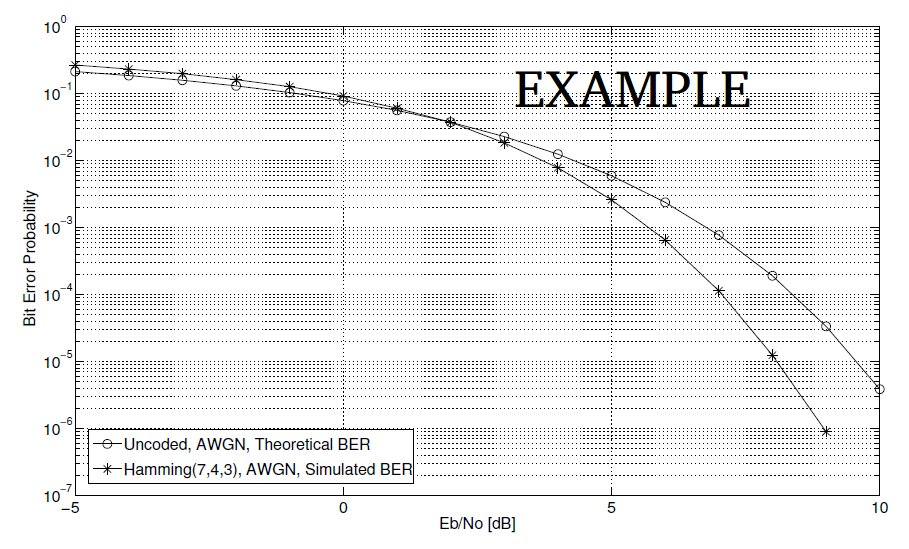

In [4]:
from IPython.display import Image
Image("./ber.jpg")

In [5]:
"""Code Here"""





'Code Here'

In [21]:
def ber_in_par(SNR):
    num_sim = os.cpu_count()
    # Create a process pool
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Map each SNR value to a parallel get_ber_rate call
        results = list(executor.map(ber_par, [SNR]*num_sim))
    
    # Calculate BER for each SNR value
    tot_er = 0
    tot_bit = 0

    # Unpack results and calculate BER for both belief propagation and Hamming
    for res in results:
        total_errors_hamm, total_bits_hamm = res
        
        # Calculate the BER for both belief propagation and Hamming decoding
        tot_er += total_errors_hamm
        tot_bit += total_bits_hamm

    # Return the BER for both decoding methods
    return tot_er/tot_bit

In [9]:
def belief_in_par(SNR):
    num_sim = os.cpu_count()
    rc = 4/7
    eb_N0 = 2*(rc)*(10**(SNR / 10))
    sigma = 1/eb_N0
    # Create a process pool
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Map each SNR value to a parallel get_ber_rate call
        results = list(executor.map(hamming_par, [SNR]*num_sim))
    
    # Calculate BER for each SNR value
    tot_er = 0
    tot_bit = 0

    # Unpack results and calculate BER for both belief propagation and Hamming
    for res in results:
        total_errors_hamm, total_bits_hamm = res
        
        # Calculate the BER for both belief propagation and Hamming decoding
        tot_er += total_errors_hamm
        tot_bit += total_bits_hamm

    # Return the BER for both decoding methods
    return tot_er/tot_bit
# Run the simulation in parallel

In [28]:
bit_count = 1000000
SNR_dB = np.arange(-5, 11, 1) 
SNR_dB_hamm = np.arange(-5, 10, 1) 

In [29]:
from ber import ber_par
BER_simulated = []
for i in SNR_dB:
    BER_simulated.append(ber_in_par(i))

In [30]:
uncoded = pd.DataFrame({"SNR": SNR_dB, "BER": BER_simulated})
uncoded.to_csv("Uncoded.csv")

In [31]:
from ham import hamming_par
BER_simulated_Hamm = []
for i in SNR_dB_hamm:
    BER_simulated_Hamm.append(belief_in_par(i))

Errors:  1195
Bits 400000
Errors:  1212
Bits 400000
Errors:  1174
Bits 400000
Errors:  1183
Bits 400000
Errors:  1249
Bits 400000
Errors:  1131
Bits 400000
Errors:  1220
Bits 400000
Errors:  333
Bits 400000
Errors:  320
Bits 400000
Errors:  318
Bits 400000
Errors:  313
Bits 400000
Errors:  332
Bits 400000
Errors:  284
Bits 400000
Errors:  337
Bits 400000
Errors:  336
Bits 400000
Errors:  621
Bits 800000
Errors:  594
Bits 800000
Errors:  679
Bits 800000
Errors:  645
Bits 800000
Errors:  697
Bits 800000
Errors:  617
Bits 800000
Errors:  622
Bits 800000
Errors:  663
Bits 800000
Errors:  922
Bits 1200000
Errors:  941
Bits 1200000
Errors:  941
Bits 1200000
Errors:  981
Bits 1200000
Errors:  919
Bits 1200000
Errors:  996
Bits 1200000
Errors:  1037
Bits 1200000
Errors:  966
Bits 1200000
Errors:  1230
Bits 1600000
Errors:  1187
Bits 1600000
Errors:  1236
Bits 1600000
Errors:  1207
Bits 1600000
Errors:  62
Bits 400000
Errors:  52
Bits 400000
Errors:  32
Bits 400000
Errors:  45
Bits 400000
Error

In [32]:
ham = pd.DataFrame({"SNR": SNR_dB_hamm, "BER": BER_simulated_Hamm})
ham.to_csv("Hamm.csv")

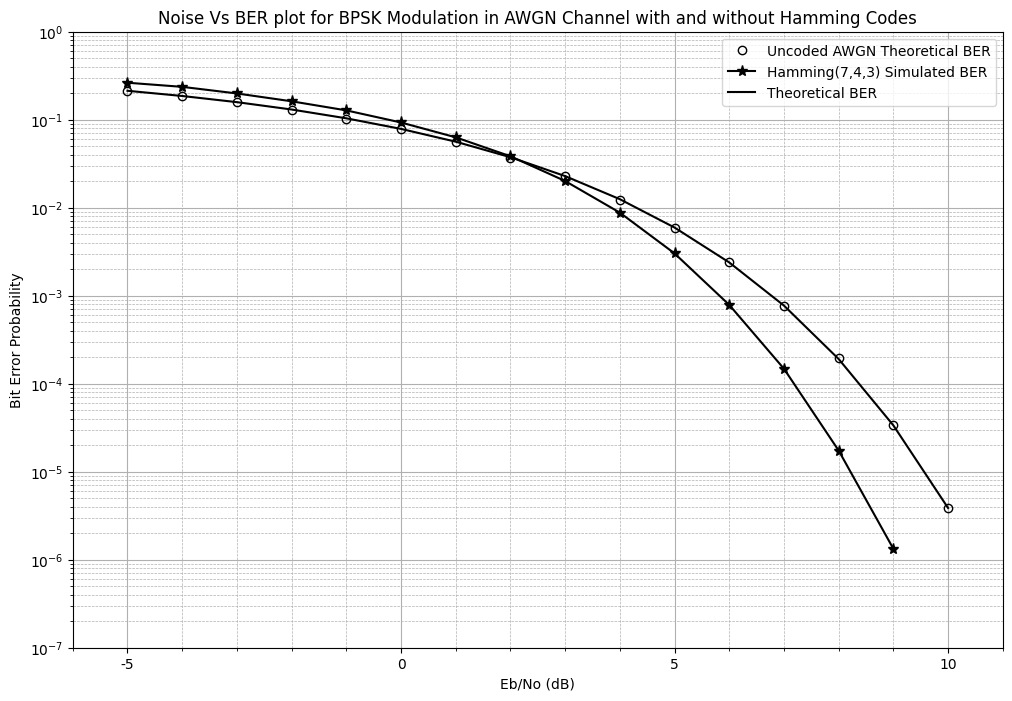

In [75]:
# Plot the simulated BER curve
plt.figure(figsize=(12, 8)) 
plt.semilogy(SNR_dB, BER_simulated,  marker='o', color='k', label='Uncoded AWGN Theoretical BER', markerfacecolor='none', linestyle='None')
plt.semilogy(SNR_dB_hamm, BER_simulated_Hamm, '-*k', markersize=8, label='Hamming(7,4,3) Simulated BER')
# Calculate theoretical BER for BPSK in AWGN
thber = 0.5 * erfc(np.sqrt(10**(SNR_dB/10)))

# Plot the theoretical BER curve
plt.semilogy(SNR_dB, thber, label='Theoretical BER', color='k')

# Plot settings
plt.xlabel('Eb/No (dB)')
plt.ylabel('Bit Error Probability')
plt.ylim(top = 1.00001, bottom = 0.0000001)
plt.xlim(-6,11)
plt.xticks(ticks=[-5, 0, 5, 10], labels=['-5', '0', '5', '10'])
plt.title('Noise Vs BER plot for BPSK Modulation in AWGN Channel with and without Hamming Codes')
plt.grid(True)

plt.minorticks_on() 
plt.grid(which='minor', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig("Results.pdf")
plt.show()

# Part B Remote Sensing - MODIS 

How to load the dataset you will be using for part B of the assignment is discussed below.

In [ ]:
import scipy.io
import pylab as plt
import numpy as np

## Plotting a random vegetation and settlement MODIS pixel

In [ ]:
def plot_mat(name=""):
    mat = scipy.io.loadmat(name)
    print(mat.keys())
    veg_gauteng = mat['veg_gauteng']
          
    #(time,pixels,band)
    #(time,pixels,7) - NDVI
    print(veg_gauteng.shape)

    #(time,pixels,band)
    #(time,pixels,7) - NDVI
    bwt_gauteng = mat['bwt_gauteng']
    #bldg_gauteng = mat['bldg_gauteng']
    print(bwt_gauteng.shape)
                   
    #PLOT A SINGLE VEGETATION MODIS PIXEL (over all time and bands - except NDVI) 
    for k in range(7):
          plt.plot(veg_gauteng[:,0,k])
    plt.title("VEGETATION")
    plt.show()
          
    #PLOT A SINGLE SETTLEMENT MODIS PIXEL (over all time and bands - except NDVI) 
    for k in range(7):
        plt.plot(bwt_gauteng[:,0,k])

    plt.title("SETTLEMENT") 
    plt.show()      

## Load the data set

In this part of the assignment you will be required to train a time-varying MODIS classification model. You will then use the SPRT algorithm and the trained time-varying model to perform sequential classification of MODIS time-series. You will also implement a Naive Bayes classifier and a Logistic Regression classifier that takes as input the MODIS data after having performed dimensionality reduction on it. In the end you will compare the efficacy of the different classification algorithms with one another. Your main task is to discern between vegetation and settlement pixels. Below we plot a random MODIS vegetation and settlement pixel.

In [ ]:
plot_mat(name="Gauteng_nochange.mat")

We now load the data into a multi-dimensional numpy array.

In [ ]:
mat = scipy.io.loadmat("Gauteng_nochange.mat")
veg_gauteng = mat['veg_gauteng']
bwt_gauteng = mat['bwt_gauteng']

**MISSING ANSWER**

Please plot the data recorded at time-step 7 of 45 in the first year. Your result should look similar to the graph depicted below.

In [ ]:
Image("./sample.png")

**`MISSING CODE`**

Let's create our observation matrix $\mathbf{X}$ -- [samples, features] and our class labels $\mathbf{y}$.

In [ ]:
X = np.concatenate((veg_gauteng,bwt_gauteng),axis=1)
print(X.shape)
yv = np.ones((592,1),dtype=int)
yb = np.zeros((333,1),dtype=int)
y = np.vstack((yv,yb))[:,0]

print(X.shape)
print(y.shape)

Now that you have your data and you understand it it is time to complete Part B of the assignment. Please refer to the main assignment document for the details.

In [ ]:
"""Code Here if you choose to answer Part B in the notebook"""